In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd

In [2]:
# Initialize data for Canada
df = pd.read_csv('Data/covid19-data-Canada.csv', parse_dates=['date'])
populations = [38, 14.7, 8.6, 5.15, 4.4, 1.18, 1.38]
#df.head()

In [3]:
run -i Skeleton.py

Below we take real data for removed in Ontario, Canada
(The real data covers the period between July 17, 2020 and January 8, 2021)

In [4]:
places = {0 : 'Canada', 1: 'Ontario', 2: 'Quebec', 3: 'British Columbia', 4: 'Alberta', 5: 'Saskatchewan', 6: 'Manitoba'}
i = 0
place = places[i]
N = populations[i]*1e6
start, end = 144, 319    # Chosen to match dates analyzed in literature (144, 319)
print ((place))

Canada


In [5]:
Rem, Infec, Susc, t_ont = Canada_init(place)
print(len(Infec))

175


The following can be derived from the SIR model:

 $\log\left(\frac{S(t)}{S(t_s)}\right) = -\frac{R_0}{N}\cdot(R(t)-R(t_s))$     (1)

$R(t) - R(t_s) = \gamma \int_{t_s}^t I(\tau) \mathrm{d}\tau$    (2)

Errors are computed below (95% confidence interval)

In [6]:
lhs1, rhs1, R_0, R_0err, textR_0, res = R_0calculator(Susc)
lhs2, rhs2, gamma, gammaerr, textgamma, res2 = gammacalculator(Rem, Infec)

Genearate SIR model with computed $R_0$, $\gamma$ and $\beta$

In [7]:
print("gamma =", f"{gamma:.6f}", "±", f"{gammaerr:.6f}")
print("R_0 =", textR_0)
beta = gamma*R_0
betaerr = np.sqrt((R_0err/R_0)**2+(gammaerr/gamma)**2)*beta    # not sure this is the way to compute the error in beta
print("beta =", f"{beta:.6f}", "±", f"{betaerr:.6f}, too small?")

gamma = 0.082748 ± 0.000321
R_0 = 1.226262 ± 0.008833
beta = 0.101471 ± 0.000830, too small?


In [8]:
I0, R0, V0 = Infec[0], Rem[0], 0
S0 = N - I0 - R0 - V0
t = np.arange(0, len(t_ont[start:end]))
# Initial conditions vector
y0 = S0, I0, R0, V0
#no vaccines yet
alpha, u = 0, 0

ret = odeint(deriv, y0, t, args=(beta, gamma))
S_model, I_model, R_model, V_model = ret.T

#SIR model with error
ret1 = odeint(deriv, y0, t, args=(beta-betaerr, gamma+gammaerr))
S_model1, I_model1, R_model1, V_model1 = ret1.T

ret2 = odeint(deriv, y0, t, args=(beta+betaerr, gamma-gammaerr))
S_model2, I_model2, R_model2, V_model2 = ret2.T

Below are all relevant plots

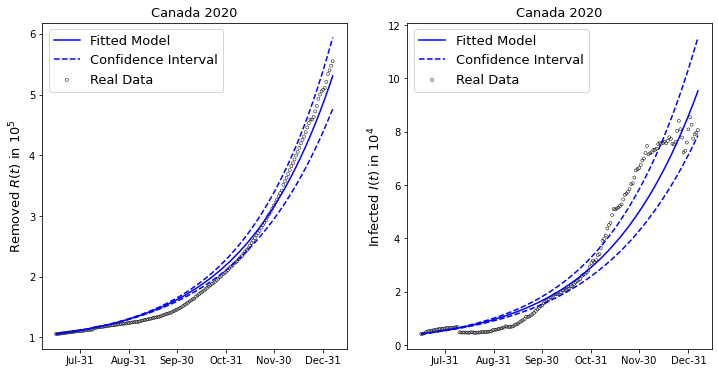

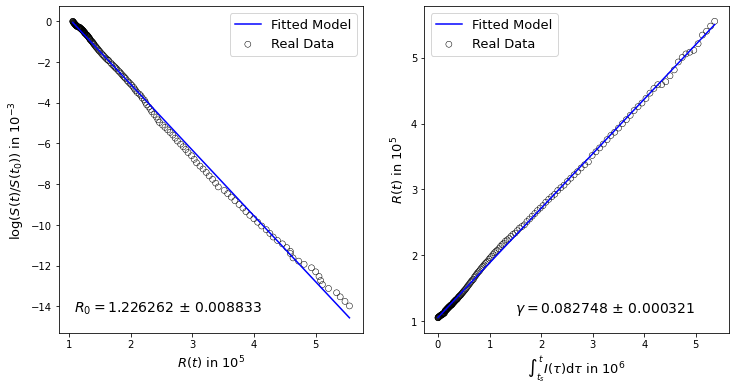

In [9]:
plotdataandfits()